# German Traffic Sign Recognition
## w281 Computer Vision
### Final Project


In [1]:
import glob
import os
import random

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# importing libraries
import tensorflow
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from skimage import io

2023-10-16 13:45:19.138218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-16 13:45:19.138272: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-16 13:45:19.138296: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-16 13:45:19.143605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_path = "./sign_data/"

In [3]:
class DataLoad:
    def __init__(self, path):
        self.path = path
        self.class_data = None
        self.train_meta = None
        self.train_data = []
        self.test_meta = None
        self.test_data = []

    def load_meta(self):
        self.class_data = pd.read_csv("./sign_data/Meta.csv")
        self.class_data = self.class_data.sort_values(by=["ClassId"])
        self.class_rows = self.class_data.shape[0]

    def display_meta(self):
        if self.class_data is not None:
            fig, ax = plt.subplots(nrows=6, ncols=8, figsize=(11, 11))
            c = 0
            for r, (file, title) in enumerate(
                zip(self.class_data["Path"], self.class_data["Description"])
            ):
                ax[r // 8, c % 8].imshow(plt.imread(self.path + file))
                ax[r // 8, c % 8].axis("off")
                ax[r // 8, c % 8].set_title(f"Class {r}", fontsize=8)
                c += 1
            for c in range(r, 48):
                ax[5, c % 8].axis("off")
            plt.show()

    def load_train(self, remove=True):
        self.train_meta = pd.read_csv(self.path + "Train.csv")
        self.train_meta = self.train_meta.sort_values(by=["ClassId"])
        if remove is True:
            self.train_meta.drop_duplicates(["Path"])

        self.train_data = [
            (self.path + i_path, cl)
            for i_path, cl in zip(self.train_meta["Path"], self.train_meta["ClassId"])
        ]
        self.train_rows = self.train_meta.shape[0]

    def display_train(self):
        if self.train_meta is not None:
            # Get random samples
            images = []
            for i in range(self.class_rows):
                images.append(
                    self.train_meta[self.train_meta["ClassId"] == i]
                    .sample()["Path"]
                    .values.astype(str)[0]
                )

            fig, ax = plt.subplots(nrows=6, ncols=8, figsize=(11, 11))
            c = 0
            for r, file in enumerate(images):
                ax[r // 8, c % 8].imshow(plt.imread(self.path + file))
                ax[r // 8, c % 8].axis("off")
                ax[r // 8, c % 8].set_title(f"Class {r}", fontsize=8)
                c += 1
            for i in range(r, 48):
                ax[5, i % 8].axis("off")
            plt.show()

    def display_distribution(self, train_test="Train"):
        fig, axs = plt.subplots(1, 1, figsize=(10, 5), tight_layout=True)

        # Remove axes splines
        for s in ["top", "bottom", "left", "right"]:
            axs.spines[s].set_visible(False)

        # Remove x, y ticks
        #         axs.xaxis.set_ticks_position('none')
        #         axs.yaxis.set_ticks_position('none')

        # Add padding between axes and labels
        axs.xaxis.set_tick_params(pad=5)
        axs.yaxis.set_tick_params(pad=5)

        axs.set_xticks(range(self.class_rows))

        # Add x, y gridlines
        axs.grid(color="grey", linestyle="-.", linewidth=0.5, alpha=0.5)

        #         # Add Text watermark
        #         fig.text(0.9, 0.15, 'German Traffic Sign class id',
        #                  fontsize = 12,
        #                  color ='black',
        #                  ha ='right',
        #                  va ='bottom',
        #                  alpha = 0.7)

        # Create histogram
        if train_test == "Train":
            data = self.train_meta["ClassId"]
            titl = "Distribution of Train Classes"
        else:
            data = self.test_meta["ClassId"]
            titl = "Distribution of Test Classes"

        N, bins, patches = axs.hist(data, bins=self.class_rows)

        # Setting color
        fracs = (N ** (1 / 8)) / N.max()
        norm = colors.Normalize(fracs.min(), fracs.max())

        for thisfrac, thispatch in zip(fracs, patches):
            color = plt.cm.magma(norm(thisfrac))
            thispatch.set_facecolor(color)

        # Adding extra features and Title
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.title(titl)
        plt.xticks(fontsize=9, rotation=60)
        plt.yticks(fontsize=10, rotation=0)

        # Show plot
        plt.show()

In [4]:
dl = DataLoad(dataset_path)

In [5]:
dl.load_meta()
dl.class_data.sample(10)

,Path,ClassId,ShapeId,ColorId,SignId
41,Meta/8.png,8,1,0,3.29
4,Meta/11.png,11,0,0,1.22
0,Meta/27.png,27,0,0,1.32
9,Meta/16.png,16,1,0,3.3
25,Meta/31.png,31,0,0,1.36
38,Meta/5.png,5,1,0,3.29
39,Meta/6.png,6,1,3,3.3
14,Meta/20.png,20,0,0,1.1
5,Meta/12.png,12,2,2,2.3
11,Meta/18.png,18,0,0,1.39


In [6]:
# dl.display_meta()
# Display meta images

In [7]:
dl.load_train()
dl.train_meta.sample(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
24731,35,38,5,5,30,33,17,Train/17/00017_00009_00011.png
8532,31,31,5,6,26,26,5,Train/5/00005_00003_00012.png
39093,34,34,6,6,29,29,42,Train/42/00042_00004_00004.png
3018,47,46,5,5,42,41,2,Train/2/00002_00007_00018.png
1838,38,39,5,5,33,34,1,Train/1/00001_00042_00008.png
11316,31,32,6,5,26,26,7,Train/7/00007_00020_00006.png
17460,31,31,5,5,26,26,11,Train/11/00011_00014_00000.png
15836,48,48,6,6,43,43,10,Train/10/00010_00026_00026.png
36455,33,34,6,5,28,29,38,Train/38/00038_00015_00006.png
18270,31,29,6,5,26,24,11,Train/11/00011_00041_00000.png


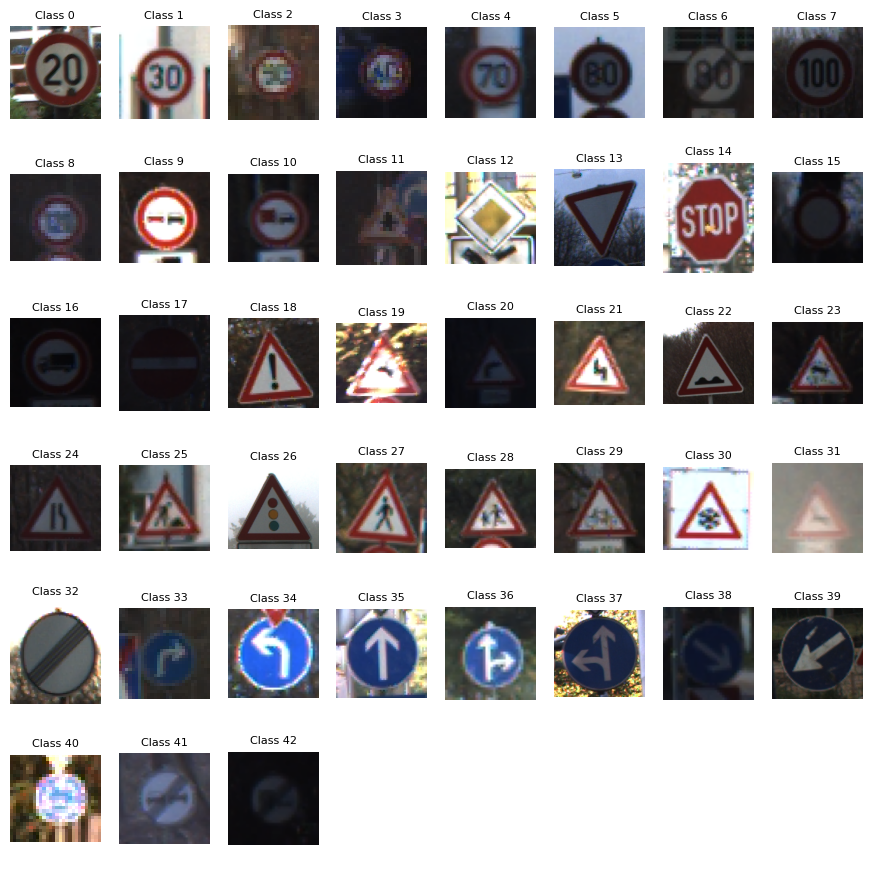

In [8]:
dl.display_train()

In [9]:
# dl.train_data
# List of images: tuple(path, class)

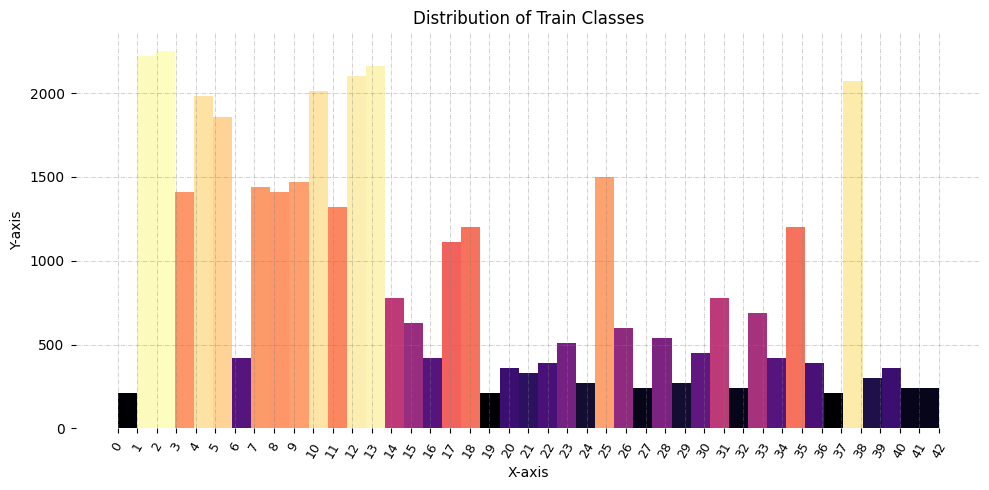

In [10]:
dl.display_distribution()